In [1]:
import tensorflow as tf
# 数据集
from tensorflow.keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

# 数据处理

In [6]:
# 维度调整
train_images = tf.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))

In [7]:
train_images.shape

TensorShape([60000, 28, 28, 1])

In [8]:
test_images = tf.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

In [9]:
test_images.shape

TensorShape([10000, 28, 28, 1])

In [10]:
# 模型构建
net = tf.keras.models.Sequential([
 # 卷积层：6个5*5的卷积核，激活是sigmoid
 tf.keras.layers.Conv2D(filters=6,kernel_size=5,activation='sigmoid',input_shape=(28,28,1)),
 # 最⼤池化
 tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
 # 卷积层：16个5*5的卷积核,激活是sigmoid
 tf.keras.layers.Conv2D(filters=16,kernel_size=5,activation='sigmoid'),
 # 最⼤池化
 tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
 # 维度调整为1维数据
 tf.keras.layers.Flatten(),
 # 全卷积层，激活sigmoid
 tf.keras.layers.Dense(120,activation='sigmoid'),
 # 全卷积层，激活sigmoid
 tf.keras.layers.Dense(84,activation='sigmoid'),
 # 全卷积层，激活softmax
 tf.keras.layers.Dense(10,activation='softmax')
])

In [11]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

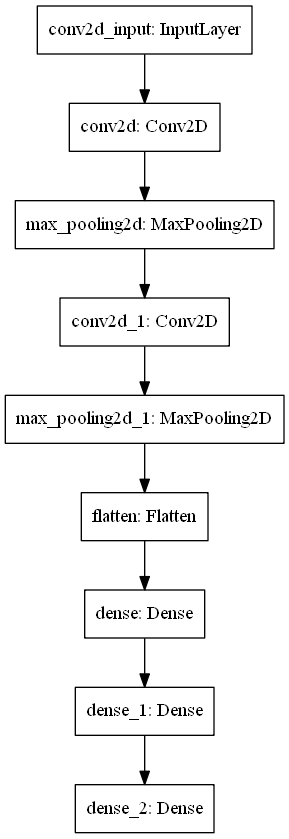

In [12]:
tf.keras.utils.plot_model(net)

# 模型编译

In [20]:
# 优化器
optimizer = tf.keras.optimizers.SGD(learning_rate=0.9)
# 模型编译：损失函数，优化器和评价指标
net.compile(optimizer=optimizer,
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# 模型训练

In [21]:
# 模型训练
net.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.7756 - accuracy: 0.7207 - val_loss: 0.1301 - val_accuracy: 0.9600
Epoch 2/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1342 - accuracy: 0.9578 - val_loss: 0.0973 - val_accuracy: 0.9670
Epoch 3/5
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1023 - accuracy: 0.9672 - val_loss: 0.0956 - val_accuracy: 0.9690
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0909 - accuracy: 0.9704 - val_loss: 0.0746 - val_accuracy: 0.9783
Epoch 5/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0680 - accuracy: 0.9788 - val_loss: 0.0582 - val_accuracy: 0.9835


# 模型评估

In [23]:
# 模型评估
score = net.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9789
Test accuracy: 0.9789000153541565
